In [1]:
from numpy.lib.function_base import _i0_1
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis

# need to firt download and install the pylevy module from https://github.com/josemiotto/pylevy
# then import its functions as follows
from scipy.stats import levy_stable
import scipy.stats as st
# import levy
from scipy.stats import levy

In [2]:
time_delay_list = [11, 15, 22, 33, 48, 71]

In [3]:
###### 
###### Probability distribution and fitting loop
###### 

df_distros = pd.DataFrame()
df_stable  = pd.DataFrame()

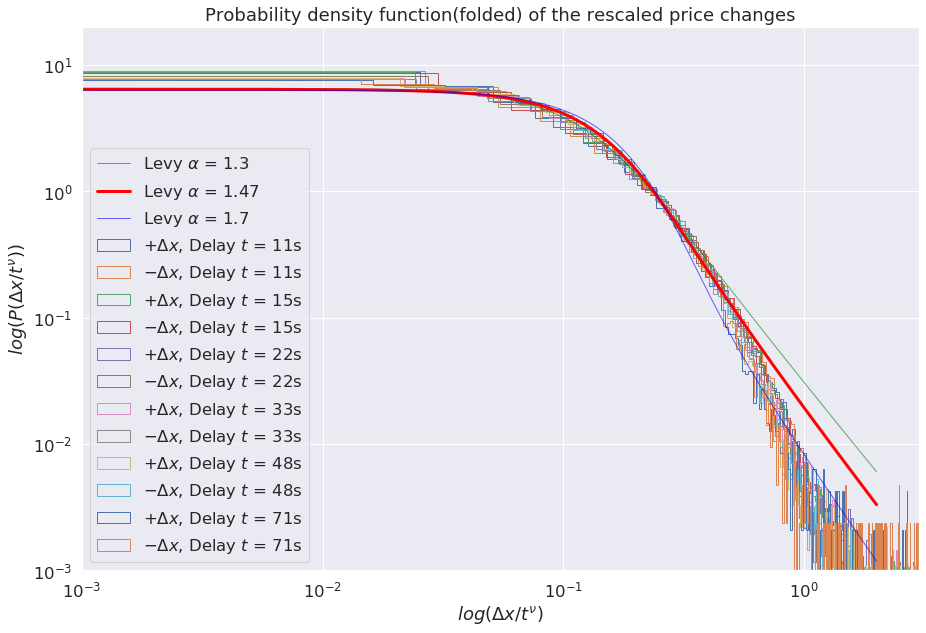

In [4]:
assets = ["UKX Index"]
asset = assets[0]

plt.rcParams.update({'font.size': 22})
sns.set(font_scale=1.5)
        
plt.figure(figsize=(15, 10))

for delay in time_delay_list :
        pdf = pd.DataFrame()
        close_timeseries = pd.read_csv(f'./{asset}/prices_delay={delay}s.csv')
        pdf['Price'] = close_timeseries['Price'].diff().dropna() #creates the price changes
        pdf['Price'] = pdf['Price']/(delay**0.68)                #rescacles timeseries according to nu=0.68
        pdf_pos = pdf.drop(pdf[pdf.Price < 0.0].index,
                           inplace=False).to_numpy()
        pdf_neg = pdf.drop(pdf[pdf.Price > 0.0].index).to_numpy() #splitting the positive and negative price changes

        plt.hist(pdf_pos, bins=500, density=True, histtype='step',
                 label=fr'$+\Delta x$, Delay $t$ = {delay}s')
        plt.hist(pdf_neg*-1, bins=500, density=True, histtype='step',
                 label=fr'$-\Delta x$, Delay $t$ = {delay}s')

        
x_neg = np.linspace(0, 2, 1000)

p_neg = levy_stable.pdf(x_neg, 1.3, 0.0, scale=0.09)
plt.plot(x_neg, 2*p_neg, label=fr'Levy $\alpha$ = 1.3', linewidth=1, color="green", alpha=0.6)

p_neg = levy_stable.pdf(x_neg, 1.47, 0.0, scale=0.09)
plt.plot(x_neg, 2*p_neg, label=fr'Levy $\alpha$ = 1.47', linewidth=3, color="red")

p_neg = levy_stable.pdf(x_neg, 1.7, 0.0, scale=0.09)
plt.plot(x_neg, 2*p_neg, label=fr'Levy $\alpha$ = 1.7', linewidth=1, color="blue", alpha=0.6)

        
plt.legend(loc='lower left')

plt.title( r'Probability density function(folded) of the rescaled price changes' )

plt.xlabel(r'$log(\Delta x/t^{\nu})$')
plt.xscale("log")
plt.xlim([1e-3, 3])

plt.ylabel(r'$log(P(\Delta x/t^{\nu}))$')
plt.yscale("log")
plt.ylim([1e-3, 20])


plt.savefig(f'./plots/pdf_folded.png')
plt.show()        

<Figure size 432x288 with 0 Axes>